In [3]:
from _tests import scripts
from scripts.notebook_utils import *

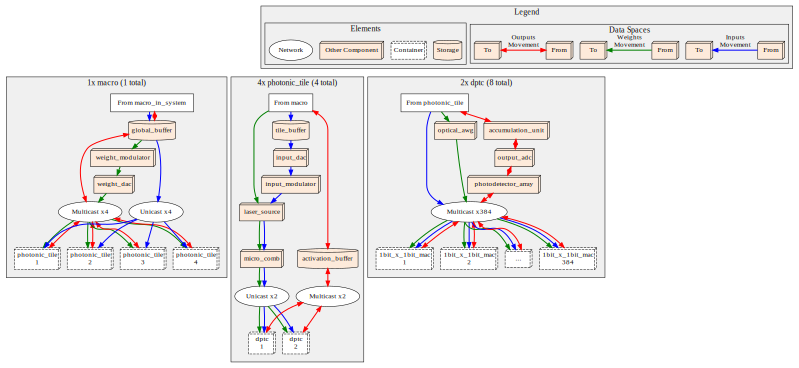

In [50]:
ARCH_PATH = "/home/workspace/models/arch/1_macro/lightening_ieee_2024/arch.yaml"
display_diagram(get_diagram("lightening_ieee_2024", ignore=DIAGRAM_DEFAULT_IGNORE))

In [51]:
ARCH_PATH = "/home/workspace/models/arch/1_macro/lightening_ieee_2024/arch.yaml"

spec = get_spec("lightening_ieee_2024")
spec.variables["MAX_UTILIZATION"] = True
results = run_mapper(spec, "my_spec")

print(dir(results))
for attr in dir(results):
    if not attr.startswith("_"):
        try:
            print(f"{attr}: {getattr(results, attr)}")
        except Exception:
            pass


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_compare_ref', 'access', 'accesses', 'add_compare_ref', 'add_compare_ref_area', 'add_compare_ref_energy', 'aggregate', 'aggregate_by', 'area', 'clear_zero_areas', 'clear_zero_energies', 'combine_per_component_area', 'combine_per_component_area_energy', 'combine_per_component_energy', 'computes', 'computes_1b', 'computes_per_joule', 'computes_per_joule_1b', 'computes_per_second', 'computes_per_second_1b', 'computes_per_second_per_square_meter', 'cycle_seconds', 'cycles', 'encoded_input_bits', 'encoded_output_bits', 'encoded_weight_bits', 'energy', 'from_output_stats', 'get_compare_ref_area', 'get_compare_ref_energy', 'input_bits', 'latency', '

{'global_buffer': 7.90268, 'weight_modulator': 0.49920000000000003, 'weight_dac': 0.352, 'tile_buffer': 0.0675292, 'activation_buffer': 0.051292, 'input_dac': 1.408, 'input_modulator': 1.9968000000000001, 'laser_source': 0.48, 'micro_comb': 5.60744, 'optical_awg': 0.0001008, 'accumulation_unit': 0.00576, 'output_adc': 0.022799999999999997, 'photodetector_array': 0.0025599999999999998} {'photodetector_array': 8.801279999999998, 'output_adc': 11.842559999999999, 'laser_source': 499.96799999999996, 'input_modulator': 13.50144, 'input_dac': 14.2848, 'activation_buffer': 25.1136, 'tile_buffer': 25.1136, 'weight_dac': 14.2848, 'weight_modulator': 9.00864, 'global_buffer': 493.05600000000004}


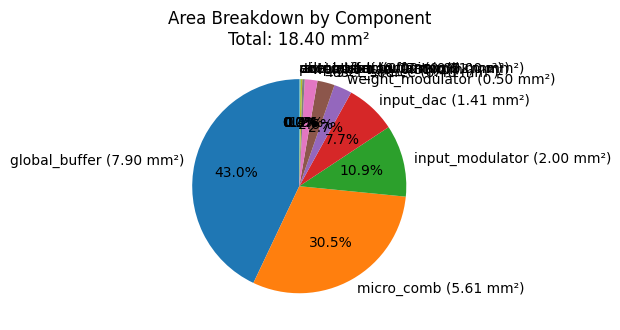

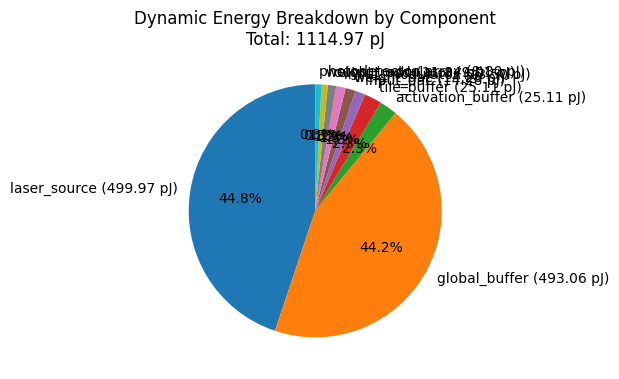

In [52]:
import matplotlib.pyplot as plt

areas = {k: v * 1e6 for k, v in results.per_component_area.items() if v > 0}
energies = {k: v * 1e12 for k, v in results.per_component_energy.items() if v > 0}
print(areas, energies)
def plot_pie(data_dict, title, unit, total_value):
    labels = []
    sizes = []
    for k, v in sorted(data_dict.items(), key=lambda x: -x[1]):
        if v < 1e-3:
            continue
        labels.append(f"{k} ({v:.2f} {unit})")
        sizes.append(v)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
    plt.title(f"{title}\nTotal: {total_value:.2f} {unit}")
    plt.tight_layout()
    plt.show()
plot_pie(areas, "Area Breakdown by Component", "mm²", sum(areas.values()))
plot_pie(energies, "Dynamic Energy Breakdown by Component", "pJ", sum(energies.values()))


In [40]:
!/usr/local/bin/accelergy /home/workspace/outputs/236.281473445815328/parsed-processed-input.yaml --oprefix timeloop-mapper.

2025-04-16 02:02:04 INFO            _                _                      
2025-04-16 02:02:04 INFO           / \   ___ ___ ___| | ___ _ __ __ _ _   _ 
2025-04-16 02:02:04 INFO          / _ \ / __/ __/ _ \ |/ _ \ '__/ _` | | | |
2025-04-16 02:02:04 INFO         / ___ \ (_| (_|  __/ |  __/ | | (_| | |_| |
2025-04-16 02:02:04 INFO        /_/   \_\___\___\___|_|\___|_|  \__, |\__, |
2025-04-16 02:02:04 INFO                                        |___/ |___/ 
2025-04-16 02:02:04 INFO        generating outputs according to the following specified output flags... 
2025-04-16 02:02:04 INFO         Please use the -f flag to update the preference (default to all output files)
2025-04-16 02:02:04 INFO        {'ERT': 1, 'ERT_summary': 1, 'ART': 1, 'ART_summary': 1, 'energy_estimation': 1, 'flattened_arch': 1}
2025-04-16 02:02:04 INFO        Located config file at /home/workspace/.config/accelergy/accelergy_config.yaml.
2025-04-16 02:02:04 INFO        config file located:
2025-04-16 02:02:04 INF